In [40]:
# import dependencies
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
# from imblearn.metrics import classification_report_imbalanced
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [13]:
HouseDF = pd.read_csv(Path('./Resources/MergedCSV_sql_FLOAT.csv'))

In [14]:
HouseDF.head()

,Unnamed: 0,abbreviatedaddress,city,zipcode,latitude,longitude,bathrooms,bedrooms,lotsize,date_sold,price,zestimate,avg_income
0,0,4008 SE Kelly St,Portland,97202,45.499569,-122.621201,1,2,4356,5/20/2021,535000,550300,39879.0
1,1,6936 SE 28th Ave,Portland,97202,45.473526,-122.634125,2,4,4791,8/16/2020,775000,874600,39879.0
2,2,1515 SE Claybourne St,Portland,97202,45.475349,-122.650620,1,2,5227,5/4/2021,521000,539700,39879.0
3,3,7941 SE 36th Ave,Portland,97202,45.465736,-122.626526,3,4,6098,12/13/2020,830000,903000,39879.0
4,4,6908 SE Cesar E Chavez Blvd,Portland,97202,45.473179,-122.622284,2,3,6969,8/11/2020,525000,598800,39879.0


In [19]:
House_FT_df = pd.DataFrame(data=HouseDF, columns=['zipcode', 'bathrooms', 'bedrooms', 'lotsize', 'avg_income', 'price'])
House_FT_df.head()

,zipcode,bathrooms,bedrooms,lotsize,avg_income,price
0,97202,1,2,4356,39879.0,535000
1,97202,2,4,4791,39879.0,775000
2,97202,1,2,5227,39879.0,521000
3,97202,3,4,6098,39879.0,830000
4,97202,2,3,6969,39879.0,525000


In [24]:
# scale all data
scaler = StandardScaler()
scaler.fit(House_FT_df)
scaled_data = scaler.transform(House_FT_df)

In [25]:
#create dataframe with scaled data
House_FT_scaled_df = pd.DataFrame(scaled_data, columns=House_FT_df.columns)

# view scaled data
House_FT_scaled_df.head()

,zipcode,bathrooms,bedrooms,lotsize,avg_income,price
0,-1.824892,-1.515085,-1.523999,-0.014765,-0.799361,-0.185069
1,-1.824892,-0.498603,0.607160,-0.014606,-0.799361,0.370735
2,-1.824892,-1.515085,-1.523999,-0.014446,-0.799361,-0.217490
3,-1.824892,0.517880,0.607160,-0.014127,-0.799361,0.498106
4,-1.824892,-0.498603,-0.458420,-0.013807,-0.799361,-0.208227


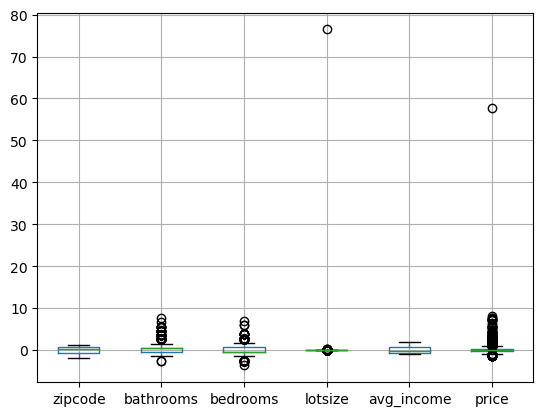

In [26]:
# plot all data (boxplot)
boxplot = House_FT_scaled_df.boxplot()

In [27]:
# get description
House_FT_scaled_df.describe()

,zipcode,bathrooms,bedrooms,lotsize,avg_income,price
count,5.853000e+03,5.853000e+03,5.853000e+03,5.853000e+03,5.853000e+03,5.853000e+03
mean,4.550581e-13,3.884737e-17,-2.330842e-16,3.641941e-18,-7.769475e-17,5.584310e-17
std,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00
min,-1.824892e+00,-2.531568e+00,-3.655158e+00,-1.636206e-02,-9.582814e-01,-1.423352e+00
25%,-7.891663e-01,-4.986026e-01,-4.584195e-01,-1.460579e-02,-7.993614e-01,-3.067316e-01
50%,1.314786e-01,5.178798e-01,-4.584195e-01,-1.428651e-02,-2.221854e-01,-1.155931e-01
75%,7.068816e-01,5.178798e-01,6.071601e-01,-1.316845e-02,8.064305e-01,1.738878e-01
max,1.282285e+00,7.633257e+00,7.000638e+00,7.649611e+01,1.810677e+00,5.763006e+01


In [28]:
# drop outlier
House_FT_scaled_df = House_FT_scaled_df.loc[House_FT_scaled_df['lotsize'] < 7]
House_FT_scaled_df.head()

,zipcode,bathrooms,bedrooms,lotsize,avg_income,price
0,-1.824892,-1.515085,-1.523999,-0.014765,-0.799361,-0.185069
1,-1.824892,-0.498603,0.607160,-0.014606,-0.799361,0.370735
2,-1.824892,-1.515085,-1.523999,-0.014446,-0.799361,-0.217490
3,-1.824892,0.517880,0.607160,-0.014127,-0.799361,0.498106
4,-1.824892,-0.498603,-0.458420,-0.013807,-0.799361,-0.208227


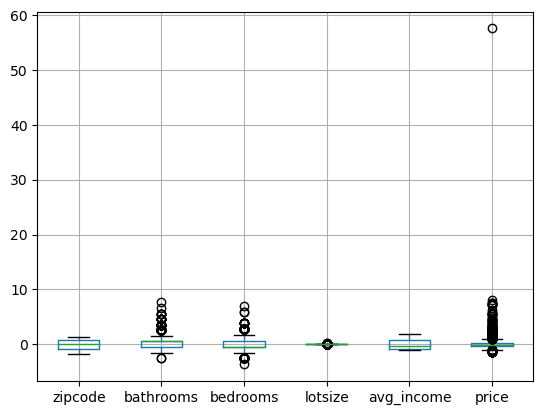

In [29]:
# plot all data again to see outliers
boxplot = House_FT_scaled_df.boxplot()

In [30]:
# check row count
House_FT_scaled_df.count()

zipcode       5852
bathrooms     5852
bedrooms      5852
lotsize       5852
avg_income    5852
price         5852
dtype: int64

In [31]:
# drop outlier in price column
House_FT_scaled_df = House_FT_scaled_df.loc[House_FT_scaled_df['price'] < 57]
House_FT_scaled_df.head()

,zipcode,bathrooms,bedrooms,lotsize,avg_income,price
0,-1.824892,-1.515085,-1.523999,-0.014765,-0.799361,-0.185069
1,-1.824892,-0.498603,0.607160,-0.014606,-0.799361,0.370735
2,-1.824892,-1.515085,-1.523999,-0.014446,-0.799361,-0.217490
3,-1.824892,0.517880,0.607160,-0.014127,-0.799361,0.498106
4,-1.824892,-0.498603,-0.458420,-0.013807,-0.799361,-0.208227


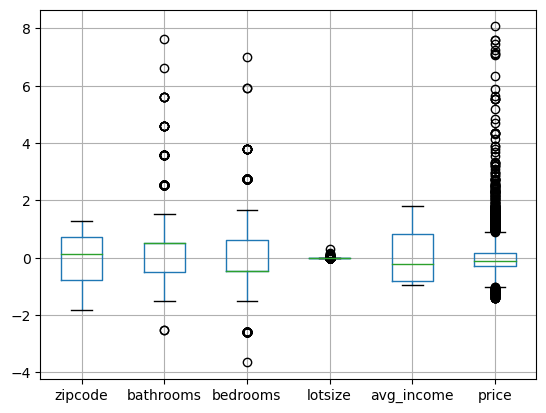

In [33]:
# plot all data again to see outliers
boxplot = House_FT_scaled_df.boxplot()

In [32]:
# check row count
House_FT_scaled_df.count()

zipcode       5851
bathrooms     5851
bedrooms      5851
lotsize       5851
avg_income    5851
price         5851
dtype: int64

In [34]:
# split into target and features 
X = pd.DataFrame(data=House_FT_scaled_df, columns=['zipcode', 'bathrooms', 'bedrooms', 'lotsize', 'avg_income'])
y = pd.DataFrame(data=House_FT_scaled_df, columns=['price'])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [41]:
# instantiate model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
# run model
y_pred = model.predict(X_test)

In [43]:
# see resutls
print(y_pred.shape)

(1463, 1)


ValueError: x and y must be the same size

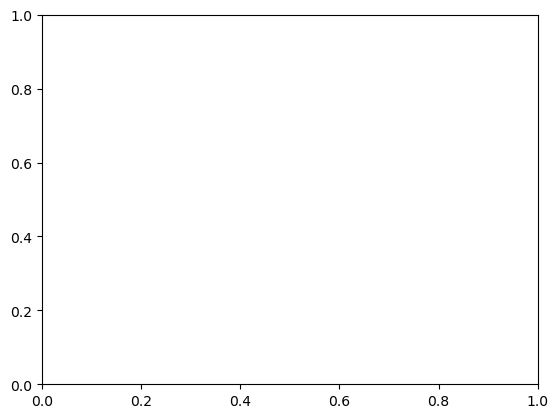

In [44]:
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')
plt.show()